In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Packages

In [8]:
import pandas as pd
import numpy as np
import os
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Preprocessing Dataset

In [9]:
train_dataset = pd.read_csv("/content/train.csv")
train_dataset.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [10]:
train_dataset.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [12]:
# for test
test_dataset = pd.read_csv("/content/test (1).csv")
test_dataset.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [13]:
full_text = train_dataset['full_text']
cohesion = train_dataset['cohesion']
syntax = train_dataset['syntax']
vocabulary = train_dataset['vocabulary']
phraseology = train_dataset['phraseology']
grammar = train_dataset['grammar']
conventions = train_dataset['conventions']

In [14]:
# for test
full_text_test = test_dataset['full_text']

In [15]:
full_text.shape

(3911,)

In [16]:
cohesion

0       3.5
1       2.5
2       3.0
3       4.5
4       2.5
       ... 
3906    2.5
3907    4.0
3908    2.5
3909    4.0
3910    3.5
Name: cohesion, Length: 3911, dtype: float64

In [17]:
np.unique(cohesion)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [18]:
len(np.unique(cohesion))

9

In [19]:
x = cohesion - 1
x

0       2.5
1       1.5
2       2.0
3       3.5
4       1.5
       ... 
3906    1.5
3907    3.0
3908    1.5
3909    3.0
3910    2.5
Name: cohesion, Length: 3911, dtype: float64

In [20]:
cohesion

0       3.5
1       2.5
2       3.0
3       4.5
4       2.5
       ... 
3906    2.5
3907    4.0
3908    2.5
3909    4.0
3910    3.5
Name: cohesion, Length: 3911, dtype: float64

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
def CleanFeatures(sentences):
  sentences = sentences.apply(lambda sequence:
                                            [ltrs for ltrs in sequence if ltrs not in string.punctuation])
  sentences = sentences.apply(lambda wrd: ''.join(wrd))
  sentences = sentences.apply(lambda sequence:
                                            [word for word in sequence.split() if word not in stop_words])
  sentences = sentences.apply(lambda wrd: ' '.join(wrd))
  return sentences

In [23]:
full_text = CleanFeatures(full_text)

In [24]:
# for test
full_text_test = CleanFeatures(full_text_test)

In [25]:
full_text

0       I think students would benefit learning homebe...
1       When problem change let best matter happening ...
2       Dear Principal If u change school policy grade...
3       The best time life become I agree greatest acc...
4       Small act kindness impact people change people...
                              ...                        
3906    I believe using cellphones class education us ...
3907    Working alone students argue decission proyect...
3908    A problem chance best What I think quote cant ...
3909    Many people disagree Albert Schweitzers quote ...
3910    Do think failure main thing people consist goa...
Name: full_text, Length: 3911, dtype: object

#Tokenizer Input Text

In [26]:
from transformers import AutoTokenizer

In [27]:
list_words = [len(text.split()) for text in full_text]

In [28]:
seq_len = np.max(list_words)
seq_len

686

In [29]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [30]:
input_ids = []
attention_mask = []

In [31]:
# for test
input_ids_test = []
attention_mask_test = []

In [32]:
for index, value in enumerate(full_text):
  tokens = tokenizer.encode_plus(value, max_length = seq_len,padding = "max_length",
                                 truncation = True, return_token_type_ids = True,
                                 return_attention_mask = True,
                                 return_tensors = 'np')
  input_ids.append(tokens['input_ids'])
  attention_mask.append(tokens['attention_mask'])

In [33]:
# for test
for index, value in enumerate(full_text_test):
  tokens = tokenizer.encode_plus(value, max_length = seq_len,padding = "max_length",
                                 truncation = True, return_token_type_ids = True,
                                 return_attention_mask = True,
                                 return_tensors = 'np')
  input_ids_test.append(tokens['input_ids'])
  attention_mask_test.append(tokens['attention_mask'])

In [34]:
input_ids = np.asarray(input_ids)
attention_mask = np.asarray(attention_mask)

In [35]:
# for test
input_ids_test = np.asarray(input_ids_test)
attention_mask_test = np.asarray(attention_mask_test)

In [36]:
# for test
input_ids_test.shape

(3, 1, 686)

In [37]:
input_ids.shape

(3911, 1, 686)

In [38]:
input_ids = np.reshape(input_ids, (input_ids.shape[0], input_ids.shape[2]))
attention_mask = np.reshape(attention_mask, (attention_mask.shape[0], attention_mask.shape[2]))

In [39]:
# for test
input_ids_test = np.reshape(input_ids_test, (input_ids_test.shape[0], input_ids_test.shape[2]))
attention_mask_test = np.reshape(attention_mask_test, (attention_mask_test.shape[0], attention_mask_test.shape[2]))

In [40]:
# for test
input_ids_test.shape

(3, 686)

In [41]:
input_ids.shape

(3911, 686)

In [42]:
len(syntax)

3911

In [43]:
syntax = np.asarray(syntax)
cohesion = np.asarray(cohesion)
vocabulary = np.asarray(vocabulary)
phraseology = np.asarray(phraseology)
grammar = np.asarray(grammar)
conventions = np.asarray(conventions)

#TFBertModel

In [44]:
from transformers import TFBertModel
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [45]:
from tensorflow.keras.layers import LSTM, Lambda
from tensorflow.keras.layers import add, maximum, subtract, minimum

In [46]:
def resnet(inputs, units):
  x = tf.keras.layers.LSTM(units,return_sequences = True,)(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  return x

In [47]:
units = 16
input_ids_m = tf.keras.layers.Input(shape = (seq_len, ), dtype = 'int32')
attention_mask_n = tf.keras.layers.Input(shape = (seq_len, ),  dtype = 'int32')
bert_m = bert(input_ids_m, attention_mask = attention_mask_n)[0]
x = resnet(bert_m, units)
for stack in range(1):
  for block in range(3):
    y = resnet(x, units)
    if stack > 0 and block == 0:
      x = tf.keras.layers.LSTM(units, return_sequences = True, dropout=0.2, recurrent_dropout=0.2)(x)
    x = minimum([x, y])

  units *=2
x1 = tf.keras.layers.GlobalAveragePooling1D()(x)
x2 = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.concatenate([x1, x2], name="our_param")
y = tf.keras.layers.Dense(1)(x)
m = tf.keras.models.Model(inputs = [input_ids_m, attention_mask_n], outputs = [y])      

In [48]:
m.layers[2].trainable = False

In [49]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 686)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 686)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 686,                                           

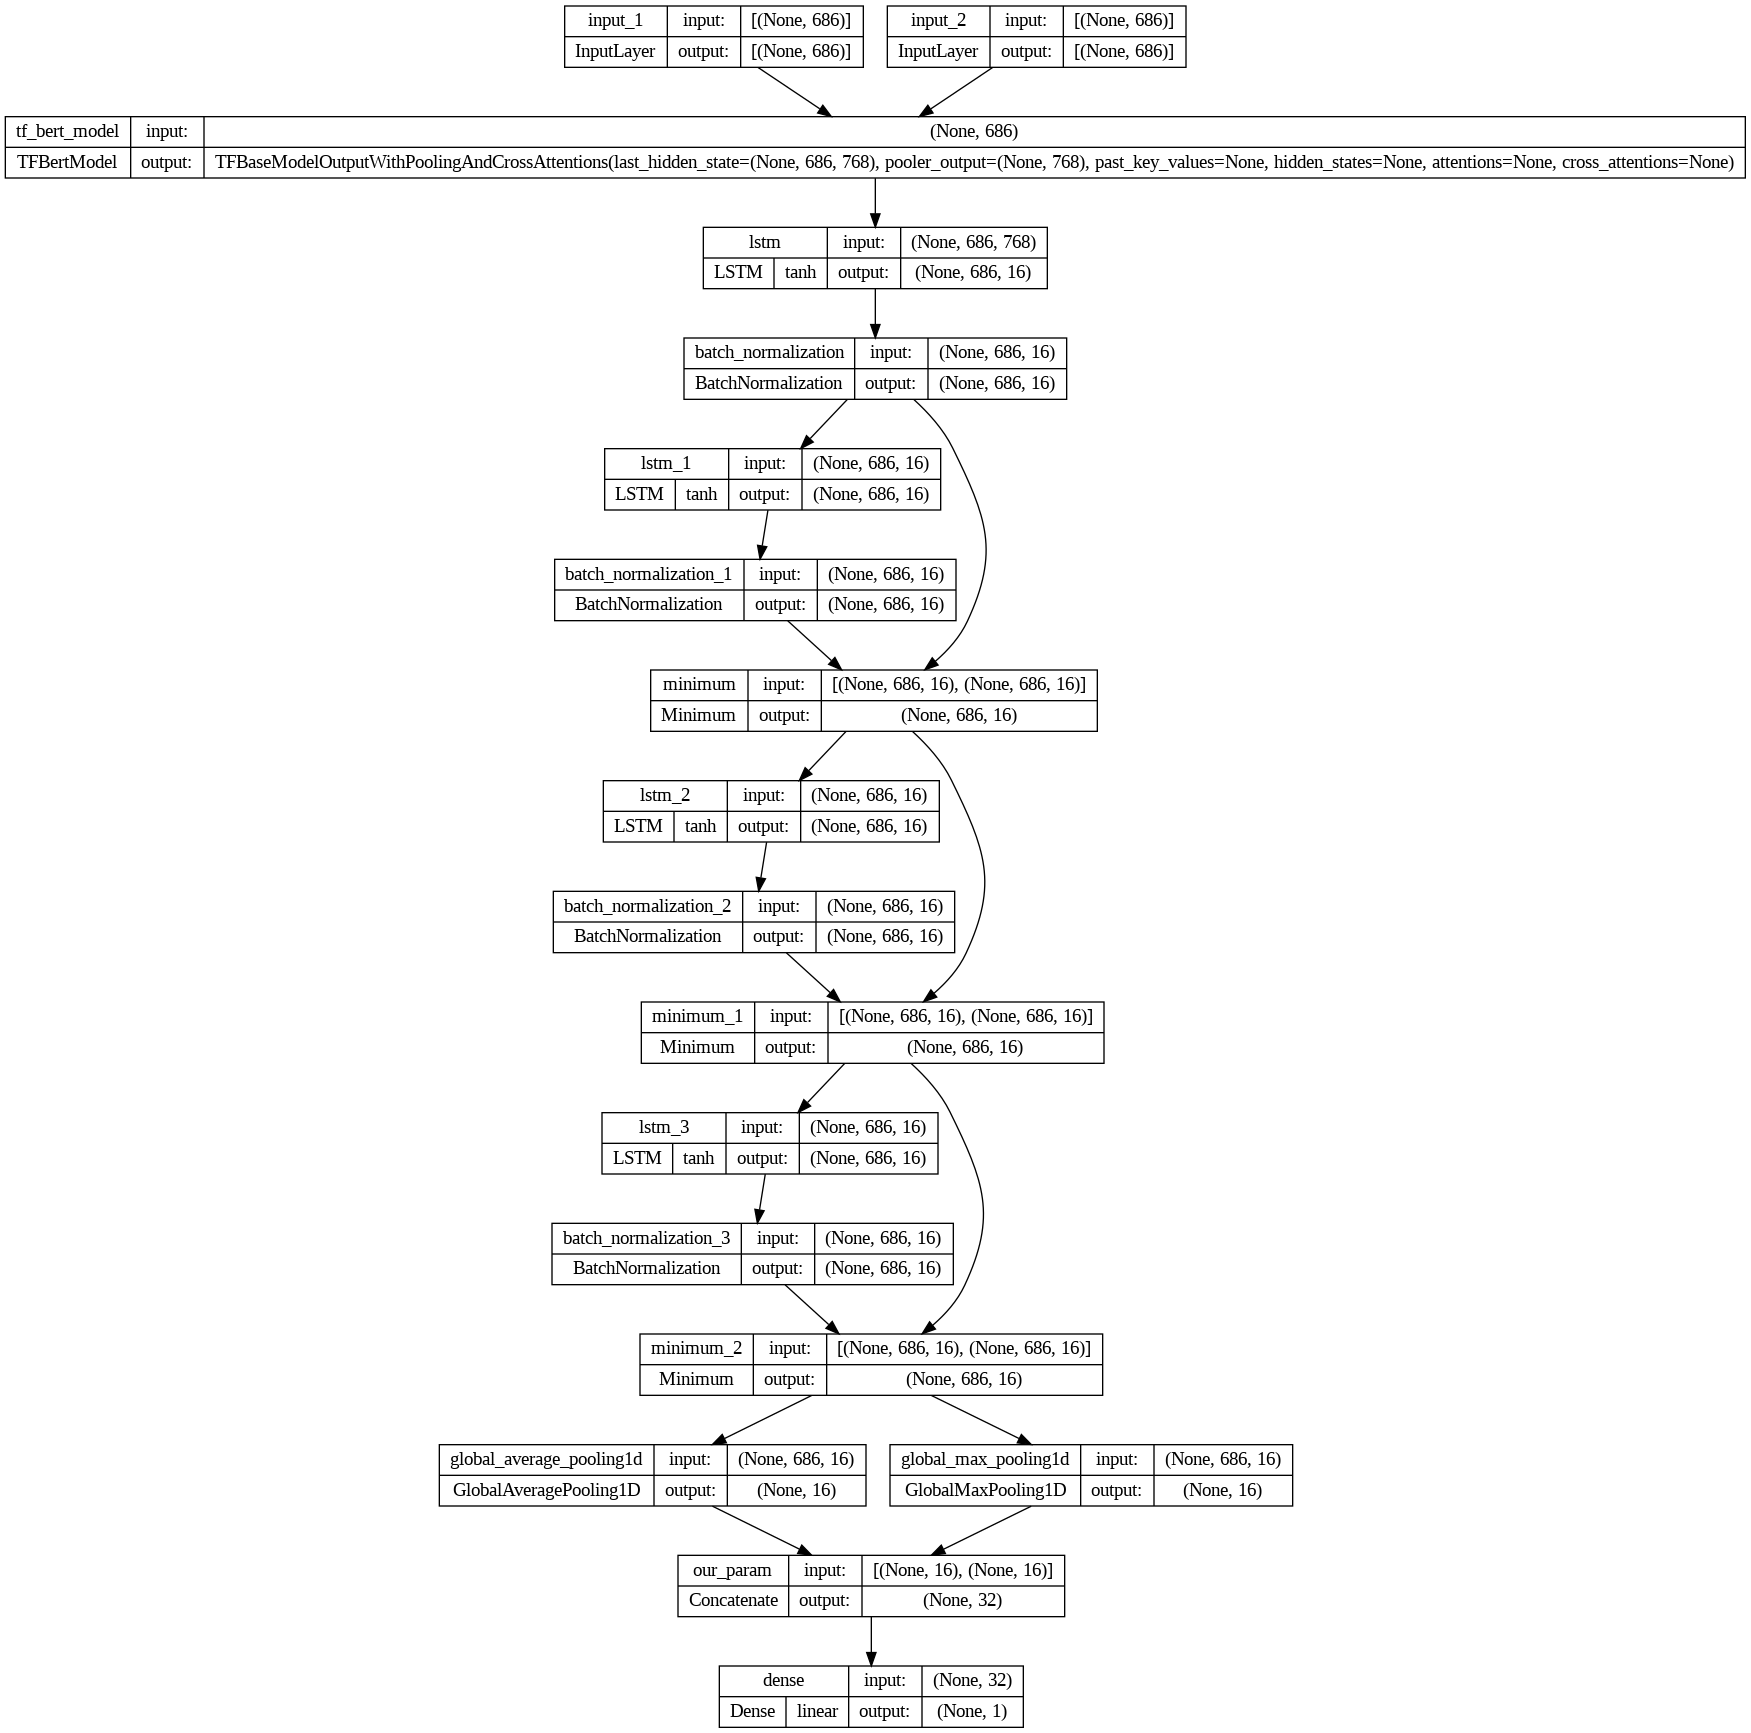

In [50]:
tf.keras.utils.plot_model(m, show_shapes=True, 
                          show_dtype=False, 
                          show_layer_names=True, 
                          expand_nested=True, 
                          show_layer_activations=True)

In [51]:
m.compile(loss= "mse", optimizer= tf.keras.optimizers.Adam(0.1))

> The following methodology aims at the gradual learning of the neural network in 6 stages, and in each stage the training of the network in the previous stage is taken advantage of, and thus the network itself is trained every time, but what differs here is the target.

In [52]:
data = [syntax, cohesion, vocabulary, phraseology, grammar, conventions]
models = []
history = []
for s in data:
    history_training = m.fit([input_ids, attention_mask],
                         y = s,
                         batch_size= 128, 
                         epochs= 6,
                         callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                                           factor=0.1, 
                                                                           mode = 'min',
                                                  patience= 2),
                             tf.keras.callbacks.EarlyStopping(patience = 2, 
                                                              monitor = 'loss', 
                                                              mode = 'min', 
                                                              restore_best_weights=True)])
    models.append(m)
    history.append(history_training)

Epoch 1/6
31/31 [==============================] - 303s 9s/step - loss: 0.8254 - lr: 0.1000
Epoch 2/6
31/31 [==============================] - 274s 9s/step - loss: 0.3928 - lr: 0.1000
Epoch 3/6
31/31 [==============================] - 274s 9s/step - loss: 0.3426 - lr: 0.1000
Epoch 4/6
31/31 [==============================] - 274s 9s/step - loss: 0.3325 - lr: 0.1000
Epoch 5/6
31/31 [==============================] - 274s 9s/step - loss: 0.3401 - lr: 0.1000
Epoch 6/6
31/31 [==============================] - 274s 9s/step - loss: 0.3250 - lr: 0.1000
Epoch 1/6
31/31 [==============================] - 274s 9s/step - loss: 0.3553 - lr: 0.1000
Epoch 2/6
31/31 [==============================] - 274s 9s/step - loss: 0.3594 - lr: 0.1000
Epoch 3/6
31/31 [==============================] - 274s 9s/step - loss: 0.3182 - lr: 0.1000
Epoch 4/6
31/31 [==============================] - 274s 9s/step - loss: 0.3127 - lr: 0.1000
Epoch 5/6
31/31 [==============================] - 274s 9s/step - loss: 0.3149 -

> Previous results can be improved by increasing a larger number of epochs

# XGBOOST WITH RESNET

> XGBRegressor helped improve the results further, but with longer training of the neural network (graduated in its learning) better results could be achieved.

In [53]:
import xgboost as xg

In [54]:
x_train = [input_ids[:3300], attention_mask[:3300]]
x_test = [input_ids[3300:], attention_mask[3300:]]
x_sub = [input_ids_test, attention_mask_test]

In [55]:
from sklearn.metrics import mean_squared_error as MSE

In [56]:
def xgboost_syntax(data, x_train, x_test, x_sub, m):
  model = tf.keras.models.Model(
    m.input, 
    m.get_layer('our_param').output
  )
  data_y_train = data[:3300]
  data_y_test = data[3300:]
  X_train_features = model.predict(x_train)
  X_test_features = model.predict(x_test)
  X_sub_features = model.predict(x_sub)
  xgb = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 100)
  xgb.fit(X_train_features, data_y_train)
  y_pred = xgb.predict(X_test_features)
  loss_metrics = MSE(data_y_test, y_pred)
  return [y_pred, data_y_test, loss_metrics, xgb.predict(X_sub_features)]

In [57]:
[y_pred, y_true, loss_metrics, res] = xgboost_syntax(syntax, x_train, x_test, x_sub, models[0])

1/1 [==============================] - 0s 305ms/step


In [58]:
loss_metrics

0.3176808867020967

In [59]:
res

array([2.985614 , 2.5483515, 3.2996342], dtype=float32)

In [60]:
[y_pred, y_true, loss_metrics, res2] = xgboost_syntax(cohesion, x_train, x_test, x_sub, models[1])

1/1 [==============================] - 0s 276ms/step


In [61]:
loss_metrics

0.3551166321173213

In [62]:
res2

array([2.971169 , 2.7981715, 3.5127518], dtype=float32)

In [63]:
[y_pred, y_true, loss_metrics, res3] = xgboost_syntax(vocabulary, x_train, x_test, x_sub, models[2])

1/1 [==============================] - 0s 223ms/step


In [64]:
loss_metrics

0.25123387430326644

In [65]:
res3

array([3.411111 , 2.875108 , 3.3769515], dtype=float32)

In [66]:
[y_pred, y_true, loss_metrics, res4] = xgboost_syntax(phraseology, x_train, x_test, x_sub, models[3])

1/1 [==============================] - 0s 285ms/step


In [67]:
loss_metrics

0.3443557886365216

In [68]:
res4

array([3.1859555, 2.8067117, 3.0091383], dtype=float32)

In [69]:
[y_pred, y_true, loss_metrics, res5] = xgboost_syntax(grammar, x_train, x_test, x_sub, models[4])

1/1 [==============================] - 0s 276ms/step


In [70]:
res5

array([2.9717007, 2.5495048, 2.813067 ], dtype=float32)

In [71]:
[y_pred, y_true, loss_metrics, res6] = xgboost_syntax(conventions, x_train, x_test, x_sub, models[5])

1/1 [==============================] - 0s 287ms/step


In [72]:
res6

array([2.850082 , 2.9924655, 3.5169744], dtype=float32)

In [73]:
csv = pd.DataFrame({
    "text_id": test_dataset['text_id'],
    "cohesion": res2,
    "syntax": res,
    "vocabulary": res3,
    "phraseology": res4,
    "grammar": res5,
    "conventions": res6

})
csv.head()

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.971169,2.985614,3.411111,3.185956,2.971701,2.850082
1,000BAD50D026,2.798172,2.548352,2.875108,2.806712,2.549505,2.992465
2,00367BB2546B,3.512752,3.299634,3.376951,3.009138,2.813067,3.516974


In [74]:
csv.to_csv("submission.csv")